In [222]:
# Importn necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [261]:
# load all datasets
dialogue_df = pd.read_csv('Harry_Potter_Movies/Dialogue.csv', encoding = "ISO-8859-1")
characters_df = pd.read_csv('Harry_Potter_Movies/Characters.csv', encoding = "ISO-8859-1")
movies_df = pd.read_csv('Harry_Potter_Movies/Movies.csv')
chapters_df = pd.read_csv('Harry_Potter_Movies/Chapters.csv', encoding = "ISO-8859-1")
places_df = pd.read_csv('Harry_Potter_Movies/Places.csv', encoding = "ISO-8859-1")
datasets_list = [dialogue_df,characters_df,movies_df,chapters_df, places_df]

In [224]:
# understand structure of these datasets

for df in datasets_list:
    df.info()
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   7444 non-null   int64 
 1   Chapter ID    7444 non-null   int64 
 2   Place ID      7444 non-null   int64 
 3   Character ID  7444 non-null   int64 
 4   Dialogue      7444 non-null   object
dtypes: int64(4), object(1)
memory usage: 290.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dt

### Dialogue.csv
- contains all dialogues and identifiers in this dataset, 7444 records
- the column "Dialogue" has Dtype as object, and all identifiers that we will use to join with other tables are integer types (e.g. Dialogue ID, Chapter ID, Place ID, etc.)
- no missing rows / cleaning required, maybe with the actual text itself 

### Characters.csv
- we see that there are 166 records in which they all have an ID and a name, but about 41 of them are not assigned a gender or species
- 90 characters are not assigned a house. Other fields in this dataset like Patronus and Wand(s) are nullable for most characters

### Movies.csv
- This small dataframe stores the 8 movies in the Harry Potter series
- no cleaning required, may do additional augmenting of columns to the dataset

### Chapters.csv
- 234 records, no missing values
- contains identifiers (Chapter ID) to join back on dataframes coming frmo Dialogue.csv and Movies.csv

### Places.csv
- all places/locations are non-null, no cleaning will be required
- not all dialogues have a place assigned

In [225]:
"""
Get a feel for what the data looks like
"""

dialogue_df.head(20)
characters_df.head(20)
movies_df.head(20)
chapters_df.head(20)
places_df.head(20)

,Place ID,Place Name,Place Category
0,1,Flourish & Blotts,Diagon Alley
1,2,Gringotts Wizarding Bank,Diagon Alley
2,3,Knockturn Alley,Diagon Alley
3,4,Ollivanders,Diagon Alley
4,5,The Leaky Cauldron,Diagon Alley
5,6,Weasleys' Wizard Wheezes,Diagon Alley
6,7,12 Grimmauld Place,Dwellings
7,8,4 Privet Drive,Dwellings
8,9,Godric's Hollow,Dwellings
9,10,Hut-on-the-Rock,Dwellings


- Now that we have identified the unique identifiers from each of these datasets, we can use Pandas to join/merge this data to create a holistic dataset

In [226]:

# merge dialogue_df and chapters_df on the identifier called 'Chapter ID'
join1 = dialogue_df.merge(chapters_df, on = 'Chapter ID')

# merge join1 (pandas DataFrame) with movies_df on the identifer called 'Movie ID'
join2 = join1.merge(movies_df, on = 'Movie ID')

# merge join2 (pandas DataFrame) with characters_df on the identifer called 'Character ID'
characters_df_columns = ['Character ID', 'Character Name', 'Gender', 'House'] # taking subset of characters_df
join3 = join2.merge(characters_df[characters_df_columns], on = 'Character ID')
join3

# merge join3 (pandas DataFrame) with places_df on the identifer called 'Place ID'
join4 = join3.merge(places_df, on = 'Place ID')
join4

# create copy of final DataFrame before we move on to different steps
df = join4.copy()

In [262]:
#df
# Uncomment to preview full merged dataframe

In [228]:
#seeing the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dialogue ID     7444 non-null   int64 
 1   Chapter ID      7444 non-null   int64 
 2   Place ID        7444 non-null   int64 
 3   Character ID    7444 non-null   int64 
 4   Dialogue        7444 non-null   object
 5   Chapter Name    7444 non-null   object
 6   Movie ID        7444 non-null   int64 
 7   Movie Chapter   7444 non-null   int64 
 8   Movie Title     7444 non-null   object
 9   Release Year    7444 non-null   int64 
 10  Runtime         7444 non-null   int64 
 11  Budget          7444 non-null   object
 12  Box Office      7444 non-null   object
 13  Character Name  7444 non-null   object
 14  Gender          7280 non-null   object
 15  House           6527 non-null   object
 16  Place Name      7444 non-null   object
 17  Place Category  7444 non-null   object
dtypes: int64

### Data Transformation
- now that I have created an encommpasing dataset, we can dig a little deeper and see what needs to be changed

In [229]:
# change the order/sequence of our columns for viewability
cols = ['Dialogue ID','Chapter ID', 'Place ID', 'Character ID', 'Movie ID', 'Movie Title', 'Release Year', 'Runtime',
        'Budget', 'Box Office', 'Movie Chapter', 'Chapter Name', 'Dialogue', 'Character Name', 'Gender', 'House', 
        'Place Name', 'Place Category']

df = df[cols]
df.head(2)

,Dialogue ID,Chapter ID,Place ID,Character ID,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Movie Chapter,Chapter Name,Dialogue,Character Name,Gender,House,Place Name,Place Category
0,1,1,8,4,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",1,Doorstep Delivery,I should have known that you would be here...P...,Albus Dumbledore,Male,Gryffindor,4 Privet Drive,Dwellings
1,2,1,8,7,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",1,Doorstep Delivery,"Good evening, Professor Dumbledore. Are the ru...",Minerva McGonagall,Female,Gryffindor,4 Privet Drive,Dwellings


In [230]:
# analyze the rows with missing values are for House
missing_house_rows = df[df['House'].isnull()]
missing_house_rows.head(5)
# impute values for House
df.fillna({"House":"No House Assigned"}, inplace = True) 


In [231]:
# analyze the rows with missing values for Gender
missing_gender_rows = df[df['Gender'].isnull()]
print("Number of missing rows for the Gender column", len(missing_gender_rows))
#missing_gender_rows['Character Name'].values

# select the 'Character Names' for Male and Females
males = ['Man', 'Man ', 'Boy', 'Old man', 'Old man ', 'Boy 2', 'Gang thug', 'Man in painting']
females = ['Woman', 'Girl', 'Waitress', 'The Fat Lady', 'Witch']

gender_mapping = {
    'Man': 'Male', 'Man ': 'Male', 'Boy': 'Male', 'Old man': 'Male', 'Old man ': 'Male',
    'Boy 2': 'Male', 'Gang thug': 'Male', 'Man in painting': 'Male',
    'Woman': 'Female', 'Girl': 'Female', 'Waitress': 'Female', 'The Fat Lady': 'Female', 'Witch': 'Female',
    'Human': 'Not Defined'
}

df.loc[df['Gender'].isnull(), 'Gender'] = df.loc[df['Gender'].isnull(), 'Character Name'].map(gender_mapping)
df.loc[df['Gender'] == 'Human', 'Gender'] = df.loc[df['Gender'] == 'Human', 'Character Name'].map(gender_mapping)
df.fillna({"Gender":"Not Defined"}, inplace = True)

missing_gender_rows = df[df['Gender'].isnull()]
print("Number of missing rows for the Gender column (after imputing):", len(missing_gender_rows)) 


Number of missing rows for the Gender column 164
Number of missing rows for the Gender column (after imputing): 0


In [232]:
#validate nan and "Human" values for the Gender column are handled
df['Gender'].unique()


array(['Male', 'Female', 'Not Defined'], dtype=object)

In [233]:
# verifying each column has no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dialogue ID     7444 non-null   int64 
 1   Chapter ID      7444 non-null   int64 
 2   Place ID        7444 non-null   int64 
 3   Character ID    7444 non-null   int64 
 4   Movie ID        7444 non-null   int64 
 5   Movie Title     7444 non-null   object
 6   Release Year    7444 non-null   int64 
 7   Runtime         7444 non-null   int64 
 8   Budget          7444 non-null   object
 9   Box Office      7444 non-null   object
 10  Movie Chapter   7444 non-null   int64 
 11  Chapter Name    7444 non-null   object
 12  Dialogue        7444 non-null   object
 13  Character Name  7444 non-null   object
 14  Gender          7444 non-null   object
 15  House           7444 non-null   object
 16  Place Name      7444 non-null   object
 17  Place Category  7444 non-null   object
dtypes: int64

### ANALYSIS 1: What is the average count of Dialouge in each movie?

                                   Movie Title  Dialogue Count
0      Harry Potter and the Chamber of Secrets             986
1  Harry Potter and the Deathly Hallows Part 1            1012
2  Harry Potter and the Deathly Hallows Part 2             712
3          Harry Potter and the Goblet of Fire             741
4       Harry Potter and the Half-Blood Prince            1070
5    Harry Potter and the Order of the Phoenix            1157
6     Harry Potter and the Philosopher's Stone             885
7     Harry Potter and the Prisoner of Azkaban             881
Average dialogues per movie:  <class 'numpy.float64'>


/var/folders/_b/hfsp9hqn3kj2vzyk2fz2fr7c0000gn/T/ipykernel_93213/2206417384.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_dialogues = counts_per_movie.max()[1]
/var/folders/_b/hfsp9hqn3kj2vzyk2fz2fr7c0000gn/T/ipykernel_93213/2206417384.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_dialogues = counts_per_movie.min()[1]


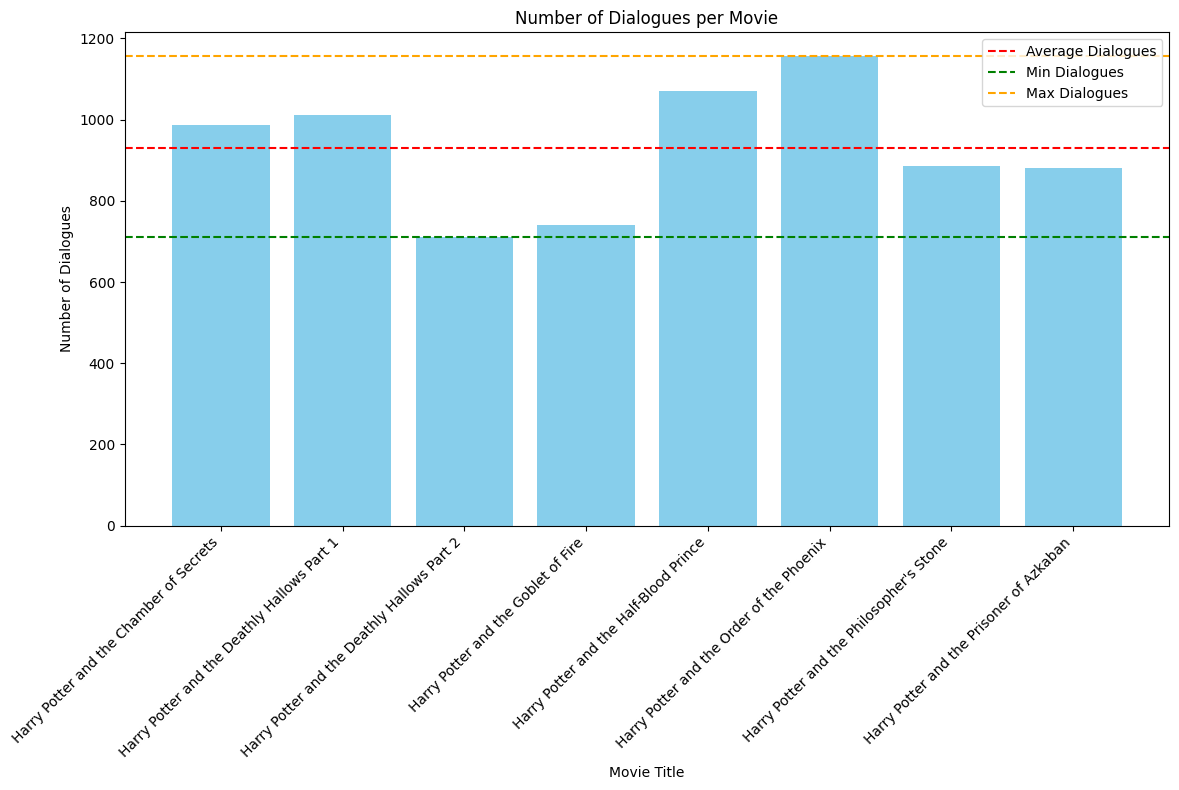

In [267]:
counts_per_movie = df.groupby('Movie Title')['Dialogue ID'].count().reset_index(name = 'Dialogue Count')
print(counts_per_movie)

avg_per_movie = counts_per_movie['Dialogue Count'].mean()
print("Average dialogues per movie: ", type(avg_per_movie))

max_dialogues = counts_per_movie.max()[1]

min_dialogues = counts_per_movie.min()[1]

plt.figure(figsize=(12, 8))
plt.bar(counts_per_movie['Movie Title'], counts_per_movie['Dialogue Count'], color = 'skyblue')
plt.axhline(y=avg_per_movie, color='red', linestyle='--', label='Average Dialogues')
plt.axhline(y=min_dialogues, color='green', linestyle='--', label='Min Dialogues')
plt.axhline(y=max_dialogues, color='orange', linestyle='--', label='Max Dialogues')
plt.legend()
plt.xlabel('Movie Title')
plt.ylabel('Number of Dialogues')
plt.title('Number of Dialogues per Movie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### ANALYSIS 2: Who are the top 3 characters from each movie with the most number of dialogues?

In [235]:
top_characters_per_movie = df.groupby(['Movie ID', 'Movie Title', 'Character Name'])['Dialogue ID'].count().reset_index(name='Dialogue Count')
top_characters_per_movie['Rank'] = top_characters_per_movie.groupby('Movie Title')['Dialogue Count'].rank(method='max', ascending=False)
top_3_characters_per_movie = top_characters_per_movie[top_characters_per_movie['Rank'] <= 3].sort_values(['Movie ID', 'Rank'])

print("Top 3 characters from each movie with the most number of dialogues:")
top_3_characters_per_movie



Top 3 characters from each movie with the most number of dialogues:


,Movie ID,Movie Title,Character Name,Dialogue Count,Rank
20,1,Harry Potter and the Philosopher's Stone,Harry Potter,242,1.0
37,1,Harry Potter and the Philosopher's Stone,Ron Weasley,142,2.0
21,1,Harry Potter and the Philosopher's Stone,Hermione Granger,97,3.0
68,2,Harry Potter and the Chamber of Secrets,Harry Potter,268,1.0
86,2,Harry Potter and the Chamber of Secrets,Ron Weasley,146,2.0
69,2,Harry Potter and the Chamber of Secrets,Hermione Granger,70,3.0
112,3,Harry Potter and the Prisoner of Azkaban,Harry Potter,203,1.0
113,3,Harry Potter and the Prisoner of Azkaban,Hermione Granger,131,2.0
127,3,Harry Potter and the Prisoner of Azkaban,Ron Weasley,102,3.0
159,4,Harry Potter and the Goblet of Fire,Harry Potter,161,1.0


### ANALYSIS 3: Which lines in the Dialogue contain the phrase "Expect Petronum?"

In [236]:
dialogues_with_expecto_patronum = df[df['Dialogue'].str.contains("expecto patronum", case=False)]
dialogues_with_expecto_patronum = dialogues_with_expecto_patronum[['Dialogue ID', 'Movie Title', 'Character Name', 'Dialogue', 'House', 'Place Name']]

print("All records in which a Dialogue contains 'expecto patronum':")
dialogues_with_expecto_patronum

All records in which a Dialogue contains 'expecto patronum':


,Dialogue ID,Movie Title,Character Name,Dialogue,House,Place Name
2336,2337,Harry Potter and the Prisoner of Azkaban,Remus Lupin,Can you do this? Yes. Very well. Close your ey...,Gryffindor,Defense Against the Dark Arts Classroom
2337,2338,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum.,Gryffindor,Defense Against the Dark Arts Classroom
2339,2340,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum! Expecto... Expecto... Expect...,Gryffindor,Defense Against the Dark Arts Classroom
2347,2348,Harry Potter and the Prisoner of Azkaban,Harry Potter,Just do it. Expecto Patronum! Expecto Patronum!,Gryffindor,Defense Against the Dark Arts Classroom
2590,2591,Harry Potter and the Prisoner of Azkaban,Harry Potter,Sirius! No. Sirius! Expecto Patronum!,Gryffindor,Great Lake
2709,2710,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum!,Gryffindor,Great Lake
3517,3518,Harry Potter and the Order of the Phoenix,Harry Potter,"""Expecto Patronum!'",Gryffindor,Little Whinging
3520,3521,Harry Potter and the Order of the Phoenix,Harry Potter,"""Expecto Patronum! '",Gryffindor,Little Whinging
3572,3573,Harry Potter and the Order of the Phoenix,Remus Lupin,"""Expecto Patronum!'",Gryffindor,4 Privet Drive
6197,6198,Harry Potter and the Deathly Hallows Part 1,Harry Potter,Expecto PATRONUM!,Gryffindor,Ministry of Magic


### Analysis 4: In each chapter of each movie, how many lines of dialogue are there?

In [237]:
dialogues_per_chapter = df.groupby(['Movie Title', 'Movie Chapter'])['Dialogue ID'].count().reset_index(name='Dialogue Count')

print("Number of dialogues in each chapter of each movie:")
dialogues_per_chapter

Number of dialogues in each chapter of each movie:


,Movie Title,Movie Chapter,Dialogue Count
0,Harry Potter and the Chamber of Secrets,1,18
1,Harry Potter and the Chamber of Secrets,2,51
2,Harry Potter and the Chamber of Secrets,3,27
3,Harry Potter and the Chamber of Secrets,4,40
4,Harry Potter and the Chamber of Secrets,5,31
...,...,...,...
229,Harry Potter and the Prisoner of Azkaban,29,61
230,Harry Potter and the Prisoner of Azkaban,30,36
231,Harry Potter and the Prisoner of Azkaban,31,5
232,Harry Potter and the Prisoner of Azkaban,32,11


### Analysis 5: What is the gender distribution in each of the movies?

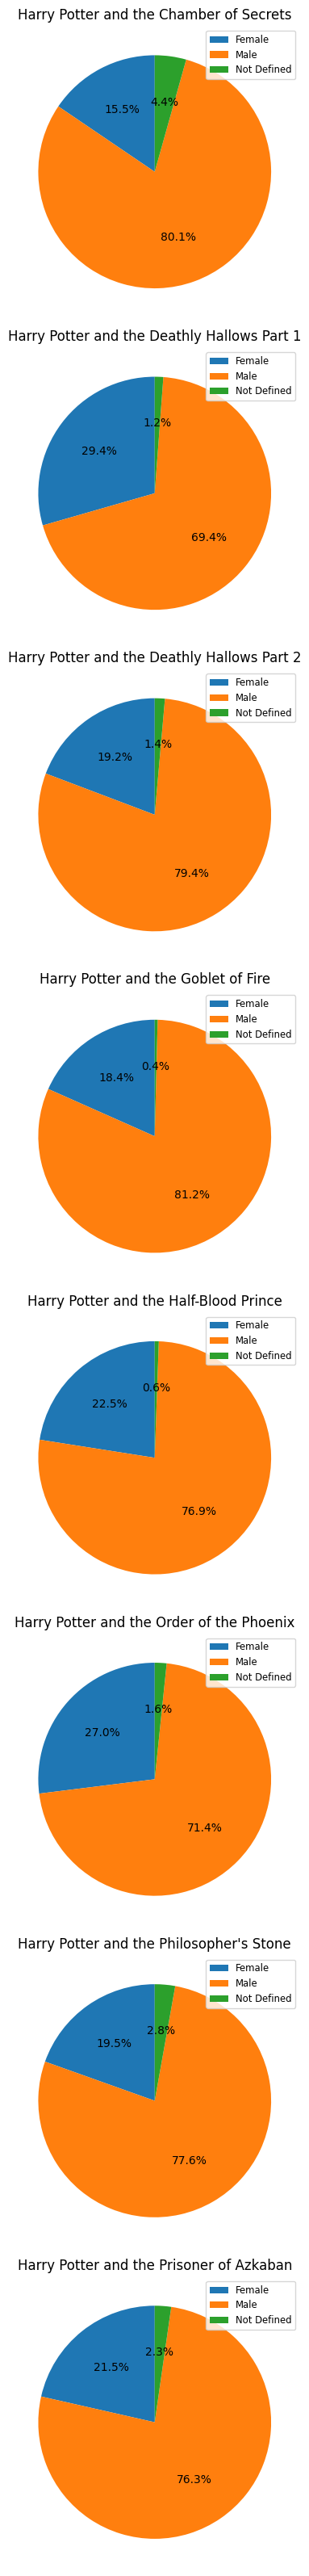

In [238]:
import matplotlib.pyplot as plt

dialogues_by_gender = df.groupby(['Movie Title', 'Gender'])['Dialogue ID'].count().unstack()

num_movies = len(df['Movie Title'].unique())

fig, axes = plt.subplots(8, 1, figsize=(8,32))
plt.title('Distribution of Dialogues by Gender for Each Movie')

axes = axes.flatten()

for i, (movie, data) in enumerate(dialogues_by_gender.iterrows()):
    ax = axes[i]
    data.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, labels=None)
    ax.set_ylabel('')  
    ax.set_title(movie) 
    ax.legend(data.index, loc='upper right', fontsize='small')  


plt.tight_layout()
plt.show()


### Analysis 6: How many words are in each movie?

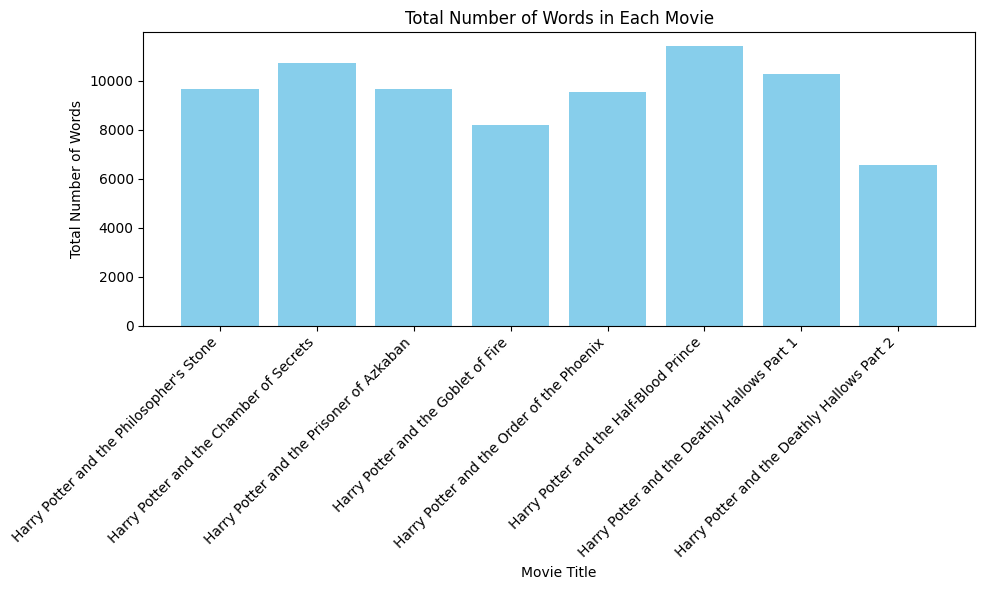

In [256]:
df['Word Count'] = df['Dialogue'].apply(lambda x: len(x.split()))
movie_word_counts = df.groupby(['Movie Title', 'Movie ID'])['Word Count'].sum().reset_index()
movie_word_counts = movie_word_counts.sort_values('Movie ID')


plt.figure(figsize=(10, 6))
plt.bar(movie_word_counts['Movie Title'], movie_word_counts['Word Count'], color='skyblue')
plt.title('Total Number of Words in Each Movie')
plt.xlabel('Movie Title')
plt.ylabel('Total Number of Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Reflection

#### Errors I encountered: 
 1. Python encountered a byte sequence that it couldn't interpret as UTF-8 while reading your dataset.
 2. How to map and replace values was causing key errors
 3. Faced deprication warnings in Analysis 1 when wanting to extract the minimum and maximum values from a pandas column


How I solved them:
 1. Used Stack Overflow to find fixes in calling pd.read_csv() to pass in an encoding type as an argument
- https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas
 2. https://stackoverflow.com/questions/73371405/remap-values-in-pandas-column-with-a-dict-none-if-keyerror
 3. Unresolved but used knowledge of slicing


What did I learn:
1. I learned how to merge datasets in multiple different ways.
2. How to figure out which columns in the dataset contain missing values, and how to fill those in/ replace them.
3. How to utilize different data structures like lists and dictionaries and apply them to the realm of data frames.
4. For visualiztions, learned how to simplify axes so it's easier to work with.
5. Learned about different functionalities part of the Matplotlib package such as axhline().
